In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
iris.data.shape

(150, 4)

In [5]:
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 4-StepModeling Pattern

###### Import the class you want to use

In [6]:
from sklearn.neighbors import KNeighborsClassifier

###### Instantiate the estimator

Estimator is scikit-learns's ter for model
Instantiate means make an instance of

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

Name of the object does not matter
Can specify tuning parameters(aka'hyperparameters') during this step
All parameters not specified are set to their defaults

In [22]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


###### Fir the model with data (aka 'data training')

In [23]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
knn.predict(np.array([3, 5, 4, 2]).reshape(1, 4))

array([2])

In [25]:
X_new = [[3, 5 ,4 ,2], [5, 4, 3,2]]
knn.predict(X_new)

array([2, 1])

### Using a differnet value for K (ModelTuining)

In [20]:
kn5 = KNeighborsClassifier(n_neighbors=5)
kn5.fit(X,y)
kn5.predict(X_new)

array([1, 1])

### Using a different classification model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X, y)

logreg.predict(X_new)

array([2, 0])

### Evaluation Procedure 1: Train and Test on Same Dataset

In [33]:
predict = knn.predict(X)
accuracy_score(y, predict)


1.0

In [32]:
predict = kn5.predict(X)
accuracy_score(y, predict)

0.9666666666666667

In [31]:
predict = logreg.predict(X)
accuracy_score(y, predict)

0.96

### Evaluation Procedure 2: Train/Test Split

In [36]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

Testing accuracy is better estimate than training accuracy of out-of-sampe performance

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.9833333333333333

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [40]:
kn5 = KNeighborsClassifier(n_neighbors=5)
kn5.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [42]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

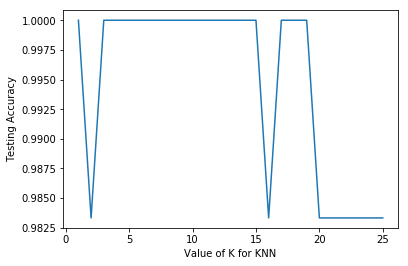

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')